In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!ls ../raw_data/

holidays_events.csv    stores.csv     train.csv
items.csv	       stores_sales   train_stores_holiday.csv
oil.csv		       test.csv       transactions.csv
sample_submission.csv  train2016.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and init data

In [4]:
# columns Unnamed: 0 drop
train_data = pd.read_csv('../raw_data/train2016.csv')

In [5]:
train_data.drop(columns='Unnamed: 0', inplace=True)

In [73]:
test_data = pd.read_csv('../raw_data/test.csv')

In [6]:
holiday_data = pd.read_csv('../raw_data/holidays_events.csv')
oil_data = pd.read_csv('../raw_data/oil.csv')

stores_data = pd.read_csv('../raw_data/stores.csv')
transactions_data = pd.read_csv('../raw_data/transactions.csv')

items_data = pd.read_csv('../raw_data/items.csv')

In [ ]:
# if we want to use
train_stores_holiday = pd.read_csv('../raw_data/train_stores_holiday.csv')

train_items_stores = pd.read_csv('../raw_data/train_items_stores.csv')

In [74]:
test_data.shape # (3370464, 5)

(3370464, 5)

---

# Load train data at 1 year

Date is an object (Convert datetime)

In [74]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [76]:
train_data['year'] = train_data['date'].dt.year

In [78]:
train_data['month'] = train_data['date'].dt.month

In [79]:
train_data['day'] = train_data['date'].dt.day

In [80]:
train_data['dayofweek'] = train_data['date'].dt.dayofweek

In [81]:
train_data_2017 = train_data[train_data['year'] == 2017]
train_data_2017

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,dayofweek


---

# Convert all date to datetime

In [112]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# oil_data['date'] = pd.to_datetime(oil_data['date'])

transactions_data['date'] = pd.to_datetime(transactions_data['date'])

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')

In [115]:
holiday_data['date'] = pd.to_datetime(holiday_data['date'])

# Train data

In [71]:
train_data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year
0,66458908,2016-01-01,25,105574,12.0,False,2016
1,66458909,2016-01-01,25,105575,9.0,False,2016
2,66458910,2016-01-01,25,105857,3.0,False,2016
3,66458911,2016-01-01,25,108634,3.0,False,2016
4,66458912,2016-01-01,25,108701,2.0,True,2016


In [9]:
train_data['store_nbr'].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54])

In [25]:
train_data.shape # (35229871, 8)

(35229871, 8)

In [72]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year'],
      dtype='object')

## `onpromotion` ? (Value - onpromotion)

In [28]:
train_data['onpromotion'].unique()

array([False,  True])

## Plot sales

In [7]:
train_data.columns

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'onpromotion', 'year'],
      dtype='object')

<AxesSubplot:xlabel='store_nbr', ylabel='unit_sales'>

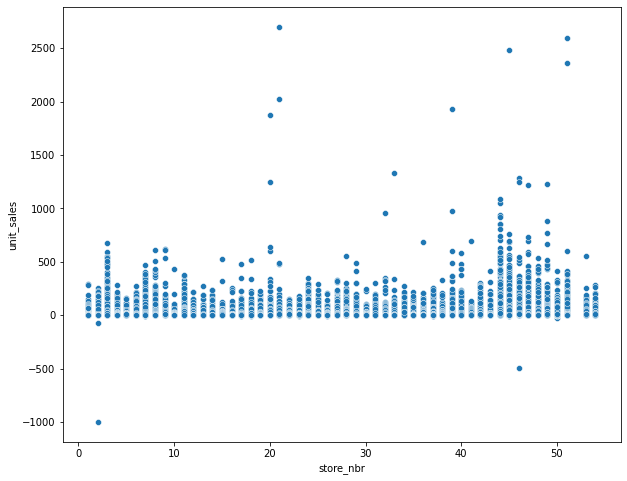

In [6]:
fig = plt.figure(figsize=(10, 8))

# plt.plot(train_data['unit_sales'])
sns.scatterplot(x='store_nbr', y='unit_sales', data=train_data.sample(500000))

In [75]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year'],
      dtype='object')

---

# Oil data

In [5]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
oil_data['date'] = pd.to_datetime(oil_data['date'])
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [11]:
oil_data_2016 = oil_data.loc[oil_data.date.dt.year == 2016]
oil_data_2016.head()

,date,dcoilwtico
783,2016-01-01,NaN
784,2016-01-04,36.81
785,2016-01-05,35.97
786,2016-01-06,33.97
787,2016-01-07,33.29


Plot in 2016

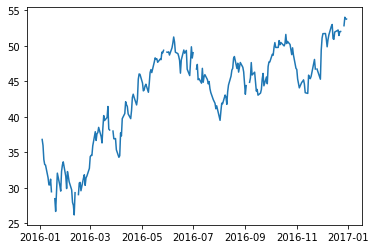

In [13]:
plt.plot(oil_data_2016['date'], oil_data_2016['dcoilwtico'])

Barplot on months of 2016 of dcoilwtico

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

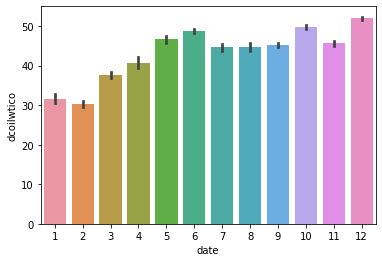

In [40]:
sns.barplot(x=oil_data_2016.date.dt.month, y=oil_data_2016['dcoilwtico'])

--- 

# Holiday data

In [31]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## `type`

In [101]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [33]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


## `locale`

In [34]:
holiday_data['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

## `locale_name`

In [35]:
len(holiday_data['locale_name'].unique())

24

In [36]:
holiday_data['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

## `transferred`

Check only 2016

In [122]:
holiday_2016 = holiday_data.loc[holiday_data['date'].dt.year == 2016]
holiday_2016

,date,type,locale,locale_name,description,transferred
211,2016-01-01,Holiday,National,Ecuador,Primer dia del ano,False
212,2016-02-08,Holiday,National,Ecuador,Carnaval,False
213,2016-02-09,Holiday,National,Ecuador,Carnaval,False
214,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False
215,2016-03-25,Holiday,National,Ecuador,Viernes Santo,False
...,...,...,...,...,...,...
292,2016-12-23,Additional,National,Ecuador,Navidad-2,False
293,2016-12-24,Additional,National,Ecuador,Navidad-1,False
294,2016-12-25,Holiday,National,Ecuador,Navidad,False
295,2016-12-26,Additional,National,Ecuador,Navidad+1,False


In [124]:
holiday_2016.loc[holiday_data['transferred'] == False].count() # 83 not transferred

date           83
type           83
locale         83
locale_name    83
description    83
transferred    83
dtype: int64

In [125]:
holiday_2016.loc[holiday_data['transferred'] == True].count() # 3 transferred

date           3
type           3
locale         3
locale_name    3
description    3
transferred    3
dtype: int64

In [126]:
holiday_2016.loc[holiday_data['transferred'] == True]

,date,type,locale,locale_name,description,transferred
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


Check `type` == 'Transfer'

In [119]:
holiday_data.loc[holiday_data['type'] == 'Transfer'].count()

date           12
type           12
locale         12
locale_name    12
description    12
transferred    12
dtype: int64

In [128]:
holiday_2016.loc[holiday_data['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


## Merge train with Holiday

In [ ]:
# type, locale, locale_name

In [6]:
holiday_data.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [25]:
# transfered : if day of week which are holiday (like SUNDAY) is moved
holiday_data['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [28]:
holiday_data['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [27]:
holiday_data['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

### Check `locale_name` with `city` and `state`

In [8]:
holiday_data['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [17]:
len(holiday_data['locale_name'].unique())

24

In [11]:
stores_data['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [24]:
print('count city', len(stores_data['city'].unique()))

count city 22


In [15]:
stores_data['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [23]:
print('Count state', len(stores_data['state'].unique()))

Count state 16


### Check if `city`, `state` and others in `holiday['locale_name']`

In [6]:
diff_city = stores_data['city'].unique()
diff_state = stores_data['state'].unique()

list_city_here = []
list_state_here = []

missing = []
for one_local_name in holiday_data['locale_name'].unique():
    if one_local_name in diff_city:
        list_city_here.append(one_local_name)
    elif one_local_name in diff_state:
        list_state_here.append(one_local_name)
    else:
        missing.append(one_local_name)
    
print('list city', list_city_here, '\n')
print('list state', list_state_here, '\n')
print('list missing', missing)

list city ['Manta', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo', 'Guaranda', 'Latacunga', 'Machala', 'Santo Domingo', 'El Carmen', 'Cayambe', 'Esmeraldas', 'Ambato', 'Ibarra', 'Quevedo', 'Quito', 'Loja', 'Salinas', 'Guayaquil'] 

list state ['Cotopaxi', 'Imbabura', 'Santo Domingo de los Tsachilas', 'Santa Elena'] 

list missing ['Ecuador']


In [10]:
check_city = []
check_state = []
check_ecuador_city = []
check_ecuador_state = []

for city in stores_data['city']:
    if city not in diff_city:
        check_city.append(city)
    if city == 'Ecuador':
        check_ecuador_city.append()

for state in stores_data['state']:
    if state not in diff_state:
        check_state.append(state)
    if state == 'Ecuador':
        check_ecuador_state.append()
        
        
print(check_city, '\n')
print(check_state, '\n')

print(check_ecuador_city, '\n')
print(check_ecuador_state)

[] 

[] 

[] 

[]


**Pas de city ou state == Ecuador** ...

### Check if Local = city ; Regional = state and National == 'Ecuador'

In [37]:
diff_city = stores_data['city'].unique()
diff_state = stores_data['state'].unique()

df_check = pd.DataFrame()
for index, holiday in holiday_data.iterrows():
#     print(holiday['locale_name'])
    if holiday['locale'] == 'Local' and holiday['locale_name'] in diff_city:
        pass
    elif holiday['locale'] == 'Regional' and holiday['locale_name'] in diff_state:
        pass
    elif holiday['locale'] == 'National' and holiday['locale_name'] == 'Ecuador':
        pass
    else:
        df_check = df_check.append(holiday, ignore_index = True)
                                         
print(df_check)
print(df_check.shape)

Empty DataFrame
Columns: []
Index: []
(0, 0)


**Local and Regional (And National) matches !**

### **Prepare to merge**

In [76]:
train_data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year
0,66458908,2016-01-01,25,105574,12.0,False,2016
1,66458909,2016-01-01,25,105575,9.0,False,2016
2,66458910,2016-01-01,25,105857,3.0,False,2016
3,66458911,2016-01-01,25,108634,3.0,False,2016
4,66458912,2016-01-01,25,108701,2.0,True,2016


In [77]:
train_data.shape # (35229871, 7)

(35229871, 7)

In [8]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [78]:
# Merge train with stores
train_stores = train_data.merge(stores_data, on='store_nbr')

train_stores

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,False,2016,Salinas,Santa Elena,D,1
1,66458909,2016-01-01,25,105575,9.0,False,2016,Salinas,Santa Elena,D,1
2,66458910,2016-01-01,25,105857,3.0,False,2016,Salinas,Santa Elena,D,1
3,66458911,2016-01-01,25,108634,3.0,False,2016,Salinas,Santa Elena,D,1
4,66458912,2016-01-01,25,108701,2.0,True,2016,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...
35229866,101688774,2016-12-31,54,2048381,6.0,True,2016,El Carmen,Manabi,C,3
35229867,101688775,2016-12-31,54,2048421,4.0,False,2016,El Carmen,Manabi,C,3
35229868,101688776,2016-12-31,54,2048471,10.0,False,2016,El Carmen,Manabi,C,3
35229869,101688777,2016-12-31,54,2048515,3.0,False,2016,El Carmen,Manabi,C,3


In [80]:
train_stores.shape # (35229871, 11)

(35229871, 11)

#### Create table `city_state` with `stores`

In [11]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [81]:
city_state = stores_data[['city', 'state']].drop_duplicates()
city_state.head()

,city,state
0,Quito,Pichincha
4,Santo Domingo,Santo Domingo de los Tsachilas
10,Cayambe,Pichincha
11,Latacunga,Cotopaxi
13,Riobamba,Chimborazo


**3 values : Local, National Regional**

#### Prepare local only

In [82]:
local_holiday = holiday_data.loc[holiday_data.locale == 'Local']

# new column city in local_holiday, useful for merging
local_holiday['city'] = local_holiday['locale_name']
local_holiday.head()

/tmp/ipykernel_1378/500300261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_holiday['city'] = local_holiday['locale_name']


,date,type,locale,locale_name,description,transferred,city
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,Manta
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,Riobamba
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,Puyo


#### Prepare regional only

In [83]:
regional_holiday = holiday_data.loc[holiday_data.locale == 'Regional']

In [84]:
regional_holiday = regional_holiday.merge(city_state, left_on='locale_name', right_on='state')
regional_holiday.head()

,date,type,locale,locale_name,description,transferred,city,state
0,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga,Cotopaxi
1,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga,Cotopaxi
2,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga,Cotopaxi
3,2015-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga,Cotopaxi
4,2016-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga,Cotopaxi


In [85]:
# state not useful for merging
regional_holiday.drop(columns='state', inplace=True)

In [86]:
regional_holiday.head()

,date,type,locale,locale_name,description,transferred,city
0,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga
1,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga
2,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga
3,2015-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga
4,2016-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Latacunga


#### Prepare National only

In [87]:
national_holiday = holiday_data.loc[holiday_data.locale == 'National']
national_holiday.head()

,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [88]:
city_state.head()

,city,state
0,Quito,Pichincha
4,Santo Domingo,Santo Domingo de los Tsachilas
10,Cayambe,Pichincha
11,Latacunga,Cotopaxi
13,Riobamba,Chimborazo


In [89]:
# Add column country in city_state to merge easily after
city_state['country'] = 'Ecuador'
city_state.head()

,city,state,country
0,Quito,Pichincha,Ecuador
4,Santo Domingo,Santo Domingo de los Tsachilas,Ecuador
10,Cayambe,Pichincha,Ecuador
11,Latacunga,Cotopaxi,Ecuador
13,Riobamba,Chimborazo,Ecuador


In [90]:
national_holiday = national_holiday.merge(city_state, left_on='locale_name', right_on='country')
national_holiday.head()

,date,type,locale,locale_name,description,transferred,city,state,country
0,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,Quito,Pichincha,Ecuador
1,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,Santo Domingo,Santo Domingo de los Tsachilas,Ecuador
2,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,Cayambe,Pichincha,Ecuador
3,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,Latacunga,Cotopaxi,Ecuador
4,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,Riobamba,Chimborazo,Ecuador


In [91]:
national_holiday.drop(columns=['state', 'country'], inplace=True)

#### `pd.concat` each `locale` with 3 previous variables

In [92]:
# local_holiday
# regional_holiday
# national_holiday

all_holiday = pd.concat([local_holiday, regional_holiday, national_holiday])[['date', 'city']].drop_duplicates()
all_holiday['is_holiday'] = 1
all_holiday

,date,city,is_holiday
0,2012-03-02,Manta,1
2,2012-04-12,Cuenca,1
3,2012-04-14,Libertad,1
4,2012-04-21,Riobamba,1
5,2012-05-12,Puyo,1
...,...,...,...
3823,2017-12-26,Loja,1
3824,2017-12-26,Machala,1
3825,2017-12-26,Esmeraldas,1
3826,2017-12-26,Manta,1


#### Merge `train_stores` with `all_holiday`

In [93]:
train_stores_holiday = train_stores.merge(all_holiday, on=['date', 'city'], how='left')
train_stores_holiday.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,city,state,type,cluster,is_holiday
0,66458908,2016-01-01,25,105574,12.0,False,2016,Salinas,Santa Elena,D,1,1.0
1,66458909,2016-01-01,25,105575,9.0,False,2016,Salinas,Santa Elena,D,1,1.0
2,66458910,2016-01-01,25,105857,3.0,False,2016,Salinas,Santa Elena,D,1,1.0
3,66458911,2016-01-01,25,108634,3.0,False,2016,Salinas,Santa Elena,D,1,1.0
4,66458912,2016-01-01,25,108701,2.0,True,2016,Salinas,Santa Elena,D,1,1.0


In [99]:
train_stores_holiday['is_holiday'].unique() # replace nan by 0 ?

array([ 1., nan])

In [94]:
train_stores.shape # (35229871, 11)

(35229871, 11)

In [97]:
train_stores_holiday.shape # (35229871, 12)

(35229871, 12)

> **Same shape rows YES**

In [ ]:
# TO DO - assign 0 on NaN
train_stores_holiday['is_holiday'].unique()

In [130]:
# train_stores_holiday.to_csv('../raw_data/train_stores_holiday.csv')
del train_stores_holiday

---

# Stores data

In [37]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## `type`

In [38]:
stores_data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

We have 54 stores in total

In [39]:
len(stores_data)

54

### Countplot y='type'

In [40]:
stores_data.groupby(by='type').count()[['store_nbr']]

,store_nbr
type,
A,9
B,8
C,15
D,18
E,4


<AxesSubplot:xlabel='count', ylabel='type'>

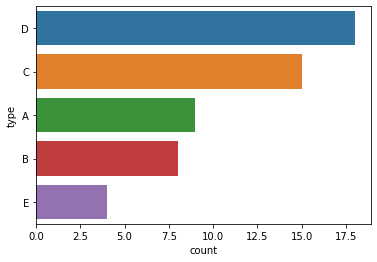

In [41]:
sns.countplot(y='type', data=stores_data, order=stores_data['type'].value_counts().index)

## `state`

In [42]:
len(stores_data['state'].unique())

16

In [43]:
stores_data['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [44]:
stores_data.groupby(by='state').count()[['store_nbr']]

,store_nbr
state,
Azuay,3
Bolivar,1
Chimborazo,1
Cotopaxi,2
El Oro,2
Esmeraldas,1
Guayas,11
Imbabura,1
Loja,1


### Countplot y='state'

<AxesSubplot:xlabel='count', ylabel='state'>

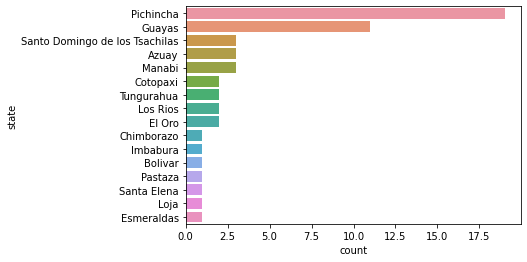

In [45]:
sns.countplot(y='state', data=stores_data, order=stores_data['state'].value_counts().index)

## `city`

In [46]:
len(stores_data['city'].unique())

22

In [47]:
stores_data['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

### by `city`

In [48]:
by_city = stores_data[['store_nbr', 'city']].groupby(by='city')\
                                    .count()['store_nbr']\
                                    .sort_values(ascending=False)
pd.DataFrame(by_city)

,store_nbr
city,
Quito,18
Guayaquil,8
Santo Domingo,3
Cuenca,3
Manta,2
Machala,2
Latacunga,2
Ambato,2
Guaranda,1


## `cluster`
(To review later)

In [55]:
stores_data.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

<AxesSubplot:xlabel='store_nbr', ylabel='cluster'>

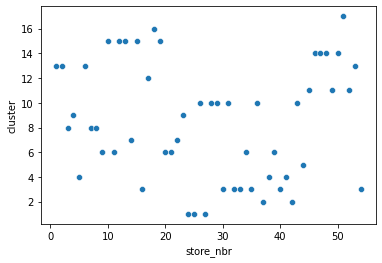

In [108]:
sns.scatterplot(x='store_nbr', y='cluster', data=stores_data)

In [100]:
# stores_data['cluster'].unique()

In [101]:
# stores_data[['store_nbr', 'cluster']].groupby(by='cluster').count()

In [102]:
# train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

---

# Transactions data

In [49]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [50]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

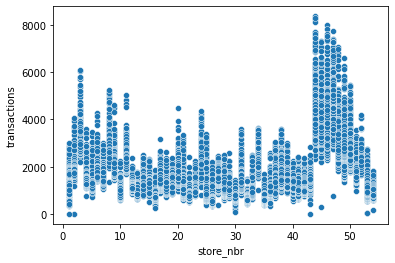

In [61]:
sns.scatterplot(x=transactions_data['store_nbr'], y=transactions_data['transactions'])

---

# Items data

In [51]:
items_data.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [52]:
stores_data.shape # (54, 5)

(54, 5)

In [53]:
items_data.shape # (4100, 4)

(4100, 4)

## `family`

In [55]:
items_data.columns

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')

In [56]:
items_data['family'].unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

In [57]:
len(items_data['family'].unique())

33

---

# Merge 3 data (train, stores, items)

In [ ]:
# train_data
# stores_data
# items_data

In [60]:
train_data.columns

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'onpromotion', 'year'],
      dtype='object')

In [61]:
items_data.columns

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')

In [62]:
stores_data.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [63]:
train_data.shape # (35229871, 8)

(35229871, 8)

In [7]:
train_items_stores = train_data.merge(items_data, on='item_nbr')\
                                .merge(stores_data, on='store_nbr')
train_items_stores

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,family,class,perishable,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
1,66505515,2016-01-02,25,105574,16.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
2,66606098,2016-01-03,25,105574,9.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
3,66705153,2016-01-04,25,105574,4.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
4,66800668,2016-01-05,25,105574,6.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35229866,101634524,2016-12-31,28,2036460,2.0,False,2016,DELI,2644,1,Guayaquil,Guayas,E,10
35229867,101309547,2016-12-28,28,2042436,16.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10
35229868,101415706,2016-12-29,28,2042436,94.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10
35229869,101524132,2016-12-30,28,2042436,90.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10


In [67]:
train_items_stores.shape # (35229871, 14)

(35229871, 14)

In [68]:
train_items_stores.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

In [8]:
# try later
train_items_stores.to_csv('../raw_data/train_items_stores.csv')
del train_items_stores

## Group by a lot of things

In [71]:
# Example nb_sales / family
by_family = train_items_stores[['family', 'unit_sales']].groupby(by='family').sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_family)

,unit_sales
family,
GROCERY I,8.608583e+07
BEVERAGES,6.174769e+07
PRODUCE,4.424810e+07
CLEANING,2.262604e+07
DAIRY,1.696719e+07
BREAD/BAKERY,1.025261e+07
POULTRY,7.561042e+06
MEATS,7.010526e+06
PERSONAL CARE,6.152929e+06


In [72]:
train_items_stores.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

### nb_vente 

#### by `item_nbr` by `store_nbr`

In [80]:
by_product_by_store = train_items_stores.groupby(['store_nbr', 'item_nbr']).sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_product_by_store)

unit_sales
store_nbr item_nbr            
44        1503844   261680.151
3         1503844   196715.807
49        1503844   194812.651
44        1047679   193127.000
          1430040   192335.000
...                        ...
14        1473410        0.063
2         220432         0.000
45        1955347        0.000
24        1463859       -1.000
9         752167      -507.000

[158778 rows x 1 columns]

#### by `perisable` (1) by `store_nbr`

In [75]:
# 0 not perishable ; 1 perishable

items_data['perishable'].unique()

array([0, 1])

In [79]:
# train_items_stores.groupby(['perishable', 'store_nbr']).sum()[['unit_sales']]

by_product_perishable_by_store = train_items_stores[train_items_stores['perishable'] == 1.0]\
    .groupby(['store_nbr']).sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_product_perishable_by_store)

,unit_sales
store_nbr,
44,6862465.426
3,5766046.199
49,5603204.227
45,5306221.972
47,4889235.997
51,3821138.061
7,3577788.363
8,3498716.609
46,3231821.753


#### by `perisable` (0) by `store_nbr`

In [81]:
by_prod_nperishable_and_store = train_items_stores[train_items_stores['perishable'] != 1.0]\
    .groupby(['store_nbr']).sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_prod_nperishable_and_store)

,unit_sales
store_nbr,
44,9503007.599
45,9217865.982
47,8487509.431
3,7880482.475
46,7144621.584
49,7089544.268
48,6339056.661
11,5481711.605
50,5049259.243


#### by `store_nbr` (rentability)

In [82]:
by_store_most = train_items_stores.groupby('store_nbr').count()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_store_most)

,unit_sales
store_nbr,
44,964732
45,956358
47,949683
3,932103
49,926236
46,919456
8,891554
48,879102
50,869247


### nb_store

#### by `city`

In [83]:
nb_store_by_city = train_items_stores.groupby('city').count()['store_nbr'].sort_values(ascending=False)

pd.DataFrame(nb_store_by_city)

,store_nbr
city,
Quito,14264546
Guayaquil,4744593
Cuenca,2207928
Santo Domingo,1821269
Ambato,1497744
Machala,1269424
Latacunga,981906
Loja,722899
Daule,717366


In [84]:
nb_store_by_city.shape

(22,)

In [86]:
stores_data['city'].unique().shape

(22,)

### nb_sales

#### by `family`

In [88]:
# nb_sales / family
by_family = train_items_stores[['family', 'unit_sales']].groupby(by='family').sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_family)

,unit_sales
family,
GROCERY I,8.608583e+07
BEVERAGES,6.174769e+07
PRODUCE,4.424810e+07
CLEANING,2.262604e+07
DAIRY,1.696719e+07
BREAD/BAKERY,1.025261e+07
POULTRY,7.561042e+06
MEATS,7.010526e+06
PERSONAL CARE,6.152929e+06


#### by `store_nbr` and `family`

In [89]:
by_store_by_family = train_items_stores[['store_nbr', 'family', 'unit_sales']].groupby(['store_nbr', 'family'])\
                                                        .sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_store_by_family)

unit_sales
store_nbr family                      
45        GROCERY I        4054549.354
44        GROCERY I        3897036.000
47        GROCERY I        3772779.000
44        PRODUCE          3745801.030
          BEVERAGES        3655321.000
...                                ...
53        BABY CARE             11.000
14        BABY CARE             11.000
19        HOME APPLIANCES       10.000
4         BABY CARE              7.000
36        LADIESWEAR             5.000

[1683 rows x 1 columns]

#### by `store_nbr`

In [100]:
by_store = train_items_stores[['store_nbr', 'family', 'unit_sales']].groupby(by='store_nbr')\
                                                        .sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_store)

,unit_sales
store_nbr,
44,1.636547e+07
45,1.452409e+07
3,1.364653e+07
47,1.337675e+07
49,1.269275e+07
46,1.037644e+07
48,8.931550e+06
51,8.489286e+06
8,8.192808e+06
